In [1]:
import numpy as np
import pandas as pd

# 문자열 참조

In [21]:
word = "grail"
sent = "a scratch"

In [12]:
word[0]

'g'

In [13]:
word[0:3]

'gra'

In [14]:
word[-1]

'l'

In [15]:
sent[-1]

'h'

In [16]:
sent[0:-8]

'a'

In [17]:
sent[-9:-8]

'a'

In [18]:
word[:3]

'gra'

In [19]:
sent[:]

'a scratch'

In [20]:
sent[::2]

'asrth'

In [22]:
a = "hello"
s = "hello {}"
s.format(a)

'hello hello'

In [24]:
print("Some digits of pi: {}".format(3.14))

Some digits of pi: 3.14


In [25]:
print("Some digits of %(cont)s: %(value).2f" % {"cont": "e", "value": 2.718})

Some digits of e: 2.72


# 정규표현식

In [31]:
import re

In [34]:
data = """
kim 990102-1234567
lee 970102-2234567
"""

In [39]:
pat = re.compile("(\d{6})[-]\d{7}")
pat

re.compile(r'(\d{6})[-]\d{7}', re.UNICODE)

In [40]:
pat.sub("\g<1>-*******", data)

'\nkim 990102-*******\nlee 970102-*******\n'

정규표현식

1. []: 문자 클래스
    * [] 사이의 문자들과 매치 (대괄호 안에는 어떤 문자도 가능)
    * 예: 정규식 [abc]가 있을 때
        * "a": 매치
        * "begin": 매치 (a나 b나 c 중에 하나라도 있으니까)
        * "test": 매치x
    * [0-7]: 0에서 7까지 ([01234567])
    * [a-z]: a에서 z까지
    * [a-zA-Z]
    * [^0-9]: 숫자가 아닌 문자 ("^"는 아니라는 의미)
    * \d: 숫자. [0-9]와 같다.
    * \D: 숫자가 아닌 것. (대문자는 반대라는 의미)
    * \s: whitespace 문자. 공백문자([ ]), "\t", "\n", "\r", "\f" 등 포함
    * \S: \s의 반대.
    * \w: 문자+숫자. [a-zA-Z0-9_]
    * . (점): 모든 문자(\n 제외)
        * 예: 정규식 [a.b]라고 가정
            * akb: 매치
            * a5b: 매치
            * aby: 매치x
        * 예: 정규식 [a[.]b] 일때는 "."이 반드시 들어있어야 한다는 뜻.
    * *: 0번 이상 반복
        * 예: [ba*t]
            * bt: 매치
            * bat: 매치
            * baaaaaaaat: 매치
    * +: 1번 이상 반복
        * 예: [ba*t]
            * bt: 매치x
    * {}: 반복 횟수 지정.
        * {최소 반복 횟수, 최대 반복 횟수}.
        * {최소반복횟수, }: 최소반복횟수 이상이면 된다
            * {1,} == +
            * {0,} == *
        * {, 최대반복횟수}: 최대반복횟수 이하면 된다.
        * {n}: 반드시 n번 나와야 한다.
            * 예: [ba{2}t]
                * baat만 매치된다.
        * ?: {0, 1}과 같다. 즉, 있어도 되고 없어도 되는데, 있는 경우 최대 1번 나와야 한다는 뜻.
            * 예: [ba?t]
                * bt, bat 둘 다 매치된다.
2. 작성법



## match

In [41]:
pat = re.compile("[a-z]")
pat.match("deep")

<re.Match object; span=(0, 1), match='d'>

In [42]:
pat = re.compile("[a-z]+")
pat.match("deep")

<re.Match object; span=(0, 4), match='deep'>

In [43]:
pat = re.compile("[a-z]*")
pat.match("deep")

<re.Match object; span=(0, 4), match='deep'>

In [44]:
pat = re.compile("[a-z]+")
pat.match("hi deep")

<re.Match object; span=(0, 2), match='hi'>

In [45]:
pat = re.compile("[ a-z]+")
pat.match("hi deep")

<re.Match object; span=(0, 7), match='hi deep'>

In [47]:
pat = re.compile("[ a-z]+")
pat.match("hi de7ep")

<re.Match object; span=(0, 5), match='hi de'>

In [48]:
pat = re.compile("[ a-z7]+")
pat.match("hi de7ep")

<re.Match object; span=(0, 8), match='hi de7ep'>

In [49]:
pat = re.compile("[ a-z6]+")
pat.match("hi de7ep")

<re.Match object; span=(0, 5), match='hi de'>

In [50]:
pat = re.compile("[ a-z6-8]+")
pat.match("hi de7ep")

<re.Match object; span=(0, 8), match='hi de7ep'>

In [53]:
pat = re.compile("[ a-z6-8]+")
res = pat.match("3hi de7ep")
print(res)

None


In [54]:
pat = re.compile("[ a-z6-8]+")
res = pat.match("3hi de7ep")
if res:    # res에 객체가 저장되었다면
    print("매치됨")
else:    # None == 매치되지 않았다면 (객체가 저장되지 않았다면)
    print("매치안됨")

매치안됨


In [55]:
pat = re.compile("[ a-z6-8]+")
res = pat.match("hi de7ep")
if res:    # res에 객체가 저장되었다면
    print("매치됨")
    print(res.group())
else:    # None == 매치되지 않았다면 (객체가 저장되지 않았다면)
    print("매치안됨")

매치됨
hi de7ep


## search

In [59]:
pat = re.compile("[a-z]+")

In [62]:
res = pat.match("3 test")
print(res)

None


In [64]:
res = pat.search("3 test")
print(res)

<re.Match object; span=(2, 6), match='test'>


match와 search의 차이점: match는 왼쪽에서부터 차근차근 확인해가면서 매치가 안되는 부분이 있으면 종료하고, search는 순서 상관없이 매치된 부분을 찾는다 (근데 처음에 매치된 하나만 찾고 끝난다)

## findall

In [66]:
pat.findall("life is too short")

['life', 'is', 'too', 'short']

In [68]:
pat.search("life is too short")

<re.Match object; span=(0, 4), match='life'>

In [69]:
pat.match("life is too short")

<re.Match object; span=(0, 4), match='life'>

In [70]:
pat.findall("7 life is too short")

['life', 'is', 'too', 'short']

In [71]:
pat.search("7 life is too short")

<re.Match object; span=(2, 6), match='life'>

In [73]:
pat.match("7 life is too short")

## finditer

In [74]:
res = pat.finditer("7 life is too short")
print(res)
for i in res:
    print(i)

<re.Match object; span=(2, 6), match='life'>
<re.Match object; span=(7, 9), match='is'>
<re.Match object; span=(10, 13), match='too'>
<re.Match object; span=(14, 19), match='short'>


## 매치된 위치 참조

In [75]:
res = pat.match("hello")
res

<re.Match object; span=(0, 5), match='hello'>

In [77]:
res.group()

'hello'

In [78]:
res.start()

0

In [79]:
res.end()

5

In [80]:
res.span()

(0, 5)

### 코드 줄이기

In [83]:
pat = re.compile("[a-z]+")
res = pat.match("test")
res

<re.Match object; span=(0, 4), match='test'>

In [84]:
res = re.match("[a-z]+", "test")
res

<re.Match object; span=(0, 4), match='test'>

위 두 코드들은 동일하다

## OR 연산자

OR 연산자 == | (shift+\\)

In [86]:
p = re.compile("[abcd]")
res = p.match("a")
print(res)

<re.Match object; span=(0, 1), match='a'>


In [85]:
p = re.compile("abcd")    # 대괄호가 없으므로 "abcd"가 반드시 들어가야 한다
res = p.match("a")
print(res)

None


In [88]:
p = re.compile("hello|hi")    # hello 또는 hi인 경우에 매치
res = p.match("hi")
print(res)

<re.Match object; span=(0, 2), match='hi'>


## 문자열의 시작: ^

In [89]:
pat = re.compile("Life")
res = pat.match("Life is too short")
print(res)

<re.Match object; span=(0, 4), match='Life'>


In [91]:
pat = re.compile("Life")
res = pat.match("My Life is too short")
print(res)    # match라서 앞에 매치 안되는게 있으므로 종료된다.

None


In [92]:
pat = re.compile("Life")
res = pat.search("My Life is too short")
print(res)

<re.Match object; span=(3, 7), match='Life'>


In [ ]:
pat = re.compile("Life")
res = pat.match("My Life is too short")
print(res)

In [93]:
pat = re.compile("^Life")    # 문자열의 시작이 Life여야 한다
res = pat.match("My Life is too short")
print(res)

None


In [95]:
pat = re.compile("^Life")    # 문자열의 시작이 Life여야 한다
res = pat.search("My Life is too short")
print(res)    # 원래 search는 패턴이 처음에 없어도 나와야 하는데, 패턴의 조건이 문자열의 시작이므로 이 경우엔 안나온다

None


## 문자열의 끝: $

In [96]:
pat = re.compile("short$")    # 문자열의 끝이 short여야 한다
res = pat.search("My Life is too short")
print(res)

<re.Match object; span=(15, 20), match='short'>


In [97]:
pat = re.compile("short$")    # 문자열의 끝이 short여야 한다
res = pat.search("My Life is too short life")
print(res)

None


## 그룹 만들기

그룹은 소괄호()를 이용해서 만든다.

하나의 정규식을 여러개의 부분으로 분할을 해서 나누어 관리하고자 할 때 사용한다.

특정 문자열이 반복되는지 여부를 확인할 때도 사용한다.

In [100]:
p = re.compile("ABC")
res = p.match("ABCABCABC DEF")
print(res)

<re.Match object; span=(0, 3), match='ABC'>


In [ ]:
p = re.compile("ABC")
res = p.search("ABCABCABC DEF")
print(res)

In [102]:
p = re.compile("ABC")
res = p.findall("ABCABCABC DEF")
print(res)

['ABC', 'ABC', 'ABC']


In [103]:
p = re.compile("ABC")
res = p.search("ABCDABCDABCD DEF")
print(res)

<re.Match object; span=(0, 3), match='ABC'>


In [108]:
p = re.compile("ABC")
res = p.match("ABCDABCDABCD DEF")
print(res)

<re.Match object; span=(0, 3), match='ABC'>


In [109]:
p = re.compile("[ABC]")
res = p.match("ABCDABCDABCD DEF")
print(res)

<re.Match object; span=(0, 1), match='A'>


In [110]:
p = re.compile("[ABC]+")
res = p.match("ABCDABCDABCD DEF")
print(res)

<re.Match object; span=(0, 3), match='ABC'>


In [112]:
p = re.compile("[A-C]")
res = p.match("ABCDABCDABCD DEF")
print(res)

<re.Match object; span=(0, 1), match='A'>


In [113]:
p = re.compile("[A-C]+")
res = p.match("ABCDABCDABCD DEF")
print(res)

<re.Match object; span=(0, 3), match='ABC'>


In [117]:
p = re.compile("(ABC)+")    # ABC가 여러번 반복됨을 의미
res = p.search("ABCABCABC DEF")
print(res)

<re.Match object; span=(0, 9), match='ABCABCABC'>


이름+" "+전화번호  의 패턴을 찾으려고 한다.

kim 010-1234-5678  (O)

010-1234-5678      (X)

kim010-1234-5678   (X)

010-1234-5678 kim  (X)

In [118]:
pat = re.compile("\w")
res = pat.search("kim 010-1234-5678")
print(res)

<re.Match object; span=(0, 1), match='k'>


In [119]:
pat = re.compile("\w+")
res = pat.search("kim 010-1234-5678")
print(res)

<re.Match object; span=(0, 3), match='kim'>


In [120]:
pat = re.compile("[a-z]+")
res = pat.search("kim 010-1234-5678")
print(res)

<re.Match object; span=(0, 3), match='kim'>


In [121]:
pat = re.compile("[a-z ]+")
res = pat.search("kim 010-1234-5678")
print(res)

<re.Match object; span=(0, 4), match='kim '>


In [122]:
pat = re.compile("\w+\s")
res = pat.search("kim 010-1234-5678")
print(res)

<re.Match object; span=(0, 4), match='kim '>


In [123]:
pat = re.compile("\w+\s")    # 그냥 \s만 붙이면 공백문자 딱 한개
res = pat.search("kim  010-1234-5678")
print(res)

<re.Match object; span=(0, 4), match='kim '>


In [124]:
pat = re.compile("\w+\s+")    # \s+이므로 공백문자 여러개도 다 나온다
res = pat.search("kim  010-1234-5678")
print(res)

<re.Match object; span=(0, 5), match='kim  '>


In [125]:
pat = re.compile("\w+\s+\d")
res = pat.search("kim 010-1234-5678")
print(res)

<re.Match object; span=(0, 5), match='kim 0'>


In [126]:
pat = re.compile("\w+\s+\d+")
res = pat.search("kim 010-1234-5678")
print(res)

<re.Match object; span=(0, 7), match='kim 010'>


In [127]:
pat = re.compile("\w+\s+\d+[-]")
res = pat.search("kim 010-1234-5678")
print(res)

<re.Match object; span=(0, 8), match='kim 010-'>


In [128]:
pat = re.compile("\w+\s+\d+[-]\d+[-]\d+")
res = pat.search("kim 010-1234-5678")
print(res)

<re.Match object; span=(0, 17), match='kim 010-1234-5678'>


이제 grouping을 해보려고 한다.

In [129]:
pat = re.compile("(\w+)\s+(\d+[-]\d+[-]\d+)")
res = pat.search("kim 010-1234-5678")
print(res)

<re.Match object; span=(0, 17), match='kim 010-1234-5678'>


grouping을 했으면 grouping option을 줄 수 있다

In [130]:
pat = re.compile("(\w+)\s+(\d+[-]\d+[-]\d+)")
res = pat.search("kim 010-1234-5678")
print(res)
print(res.group())    # 매치된 전체 문자열

<re.Match object; span=(0, 17), match='kim 010-1234-5678'>
kim 010-1234-5678


In [131]:
pat = re.compile("(\w+)\s+(\d+[-]\d+[-]\d+)")
res = pat.search("kim 010-1234-5678")
print(res)
print(res.group(0))    # 매치된 전체 문자열

<re.Match object; span=(0, 17), match='kim 010-1234-5678'>
kim 010-1234-5678


In [133]:
pat = re.compile("(\w+)\s+(\d+[-]\d+[-]\d+)")
res = pat.search("kim 010-1234-5678")
print(res)
print(res.group(1))    # 매치된 1번째 그룹 문자열

<re.Match object; span=(0, 17), match='kim 010-1234-5678'>
kim


In [134]:
pat = re.compile("(\w+)\s+(\d+[-]\d+[-]\d+)")
res = pat.search("kim 010-1234-5678")
print(res)
print(res.group(2))    # 매치된 2번째 그룹 문자열

<re.Match object; span=(0, 17), match='kim 010-1234-5678'>
010-1234-5678


In [135]:
pat = re.compile("(\w+)\s+(\d+[-](\d+)[-]\d+)")    # 안에 국번호(1234)를 소괄호로 또 묶음
res = pat.search("kim 010-1234-5678")
print(res)
print(res.group(3))    # 매치된 3번째 그룹 문자열

<re.Match object; span=(0, 17), match='kim 010-1234-5678'>
1234


* 왼쪽에서 부터 세어서 그룹의 번호를 매긴다

## 응용

In [137]:
re.match("[0-9]*", "1234")

<re.Match object; span=(0, 4), match='1234'>

In [138]:
re.match("[0-9]+", "1234")

<re.Match object; span=(0, 4), match='1234'>

In [143]:
print(re.match("[0-9]+", "abcd"))

None


In [144]:
print(re.match("a*b", "a"))

None


In [145]:
print(re.match("a*b", "ab"))

<re.Match object; span=(0, 2), match='ab'>


In [146]:
print(re.match("a*b", "b"))

<re.Match object; span=(0, 1), match='b'>


In [147]:
print(re.match("a*b", "aab"))

<re.Match object; span=(0, 3), match='aab'>


In [148]:
print(re.match("a+b", "aab"))

<re.Match object; span=(0, 3), match='aab'>


In [149]:
print(re.match("K?", "K"))

<re.Match object; span=(0, 1), match='K'>


In [151]:
print(re.match("K?", "K9"))

<re.Match object; span=(0, 1), match='K'>


In [153]:
print(re.match("K?", "K99"))

<re.Match object; span=(0, 1), match='K'>


In [154]:
print(re.match("K.", "K99"))

<re.Match object; span=(0, 2), match='K9'>


In [155]:
print(re.match("k{3}", "kkabc"))

None


In [156]:
print(re.match("k{3}", "kkkabc"))

<re.Match object; span=(0, 3), match='kkk'>


In [157]:
print(re.match("(k){3}", "kkkabc"))

<re.Match object; span=(0, 3), match='kkk'>


In [158]:
print(re.match("(hi){3}", "hihihihikkkabc"))

<re.Match object; span=(0, 6), match='hihihi'>


In [159]:
print(re.match("(hi)", "hihihihikkkabc"))

<re.Match object; span=(0, 2), match='hi'>


In [161]:
print(re.match("[0-9]", "010-123-4567"))

<re.Match object; span=(0, 1), match='0'>


In [162]:
print(re.match("[0-9]+", "010-123-4567"))

<re.Match object; span=(0, 3), match='010'>


In [163]:
print(re.match("[0-9]{3}", "010-123-4567"))

<re.Match object; span=(0, 3), match='010'>


In [165]:
print(re.match("[0-9]{1,3}", "010-123-4567"))

<re.Match object; span=(0, 3), match='010'>


In [166]:
print(re.match("[0-9]{1,3}", "01-123-4567"))

<re.Match object; span=(0, 2), match='01'>


In [167]:
print(re.match("\w*", "Hello123"))

<re.Match object; span=(0, 8), match='Hello123'>


In [168]:
# 한글
print(re.match("[가-힣]+", "딥러닝"))

<re.Match object; span=(0, 3), match='딥러닝'>


In [169]:
print(re.match("[^A-Z]+", "hello"))    # [^A-Z]+: 대문자가 아닌 문자열 하나 이상

<re.Match object; span=(0, 5), match='hello'>


In [170]:
print(re.match("[^A-Z]+", "helLo"))

<re.Match object; span=(0, 3), match='hel'>


In [171]:
print(re.match("^[A-Z]+", "helLo"))    # ^[A-Z]+: 대문자로 시작하는 문자열 하나 이상

None


In [172]:
print(re.match("^[A-Z]+", "HELlo"))

<re.Match object; span=(0, 3), match='HEL'>


In [176]:
# 숫자로 반드시 끝나는 문자열 찾기
print(re.search("\d+$", "dlf7"))

<re.Match object; span=(3, 4), match='7'>


In [178]:
# 숫자로 반드시 끝나는 문자열 찾기
print(re.search("\d+$", "dlf7564"))

<re.Match object; span=(3, 7), match='7564'>


In [177]:
# 숫자로 반드시 끝나는 문자열 찾기
print(re.search("\d+$", "dlf7564abd"))

None


In [183]:
# *이 1개 이상 있는지 판단하는 문자열
print(re.search("\*+", "100 ** 2"))    # 메타문자로 약속이 되어져있는 문자들은 그 자체를 문자열로 보려면 앞에 \를 붙여줘야 한다
# 메타문자: 정규표현식에 사용되는 특별한 의미의 특수문자 (*, 소괄호, 중괄호, 대괄호, + 등등)

<re.Match object; span=(4, 6), match='**'>


In [184]:
# *이 1개 이상 있는지 판단하는 문자열
print(re.search("[*]+", "100 ** 2"))    # 이렇게 해도 된다

<re.Match object; span=(4, 6), match='**'>


In [187]:
# "숫자 숫자" 출력
print(re.match("[0-9 ]+", "10 200"))

<re.Match object; span=(0, 6), match='10 200'>


In [189]:
print(re.match("\d+ \d+", "10 200"))

<re.Match object; span=(0, 6), match='10 200'>


In [190]:
print(re.match("\d+\s\d+", "10 200"))

<re.Match object; span=(0, 6), match='10 200'>


In [191]:
print(re.match("(\d+) (\d+)", "10 200"))

<re.Match object; span=(0, 6), match='10 200'>


In [192]:
res = re.match("(\d+) (\d+)", "10 200")
res.group(1)

'10'

In [193]:
res = re.match("(\d+) (\d+)", "10 200")
res.group(2)

'200'

In [195]:
res = re.match("(\d+) (\d+)", "10 200")
res.group()

'10 200'

In [194]:
res = re.match("(\d+) (\d+)", "10 200")
res.groups()

('10', '200')

In [196]:
res = re.match("(\d+) (\d+)", "10 200")
res.groups()[0]

'10'

## 그룹 단위로 별칭 설정하기

In [197]:
res = re.match("(\d+) (\d+) (\d+)", "011 1234 5678")
res.group(3)

'5678'

In [198]:
# 그룹 단위로 별칭 설정하기: ?P<그룹이름>
res = re.match("(?P<ln>\d+) (?P<sn>\d+) (?P<tn>\d+)", "011 1234 5678")
res.group("ln")

'011'

In [200]:
re.findall("\d+", "1 2 abc 3 abc 4 5 abc 67")    # 길이 1 이상 모든 숫자 추출

['1', '2', '3', '4', '5', '67']

In [209]:
# 한 패턴으로
# 문자열.문자열
# 혹은
# 문자열
# 혹은
# 문자열.
# 추출하기
print(re.match("[a-zA-Z]+[.]?[a-zA-Z]*$", "hello.world"))    # 전부 출력
print(re.match("[a-zA-Z]+[.]?[a-zA-Z]*$", "hello.1234"))    # None
print(re.match("[a-zA-Z]+[.]?[a-zA-Z]*$", "hello"))    # 전부 출력

<re.Match object; span=(0, 11), match='hello.world'>
None
<re.Match object; span=(0, 5), match='hello'>


# 문자열 관련 함수

In [210]:
"asfd".capitalize()    # 대문자로 바꿔라

'Asfd'

In [211]:
"asfdasfd".count("f")    # 문자열에서 특정 문자를 세라

2

In [212]:
"asfd asfd".startswith("as")    # 특정 문자열로 시작하는지 확인

True

In [213]:
"asfd asfd".endswith("fd")    # 특정 문자열로 끝나는지 확인

True

In [214]:
"asfd asfd".find("s")    # 첫번째 발견되는 위치 리턴

1

In [215]:
"asfd asfd".index("asfd")    # 어느 위치에서 문자열이 시작하느냐

0

In [216]:
"asdfdf asfd".index("asfd")

7

In [217]:
"asdfdf asfd".isalpha()    # isalpha: 알파벳이냐    # 이 경우 공백문자가 들어있으므로 False

False

In [218]:
"asdfdfasfd".isalpha()

True

In [219]:
"222".isdecimal()

True

In [220]:
"I am 23".isalnum()    # isalnum: 알파벳과 문자이냐    # 이 경우 공백문자가 있어서 False

False

In [221]:
"Iam23".isalnum()

True

In [222]:
" sdjflksdf sfd ".strip()    # 좌우 공백 제거

'sdjflksdf sfd'

## apply 함수

In [223]:
df = pd.DataFrame({
    "a": [1, 2, 3],
    "b": [2, 3, 4]
})
df

,a,b
0,1,2
1,2,3
2,3,4


In [225]:
def mysq(x):
    return x**2

def myexp(x, n):
    return x**n

In [226]:
print(df.apply(mysq))

   a   b
0  1   4
1  4   9
2  9  16


In [227]:
print(df["a"].apply(mysq))

0    1
1    4
2    9
Name: a, dtype: int64


In [229]:
print(df["b"].apply(myexp, n=3))

0     8
1    27
2    64
Name: b, dtype: int64


In [230]:
df

,a,b
0,1,2
1,2,3
2,3,4


In [231]:
def prn(x):
    print(x)

In [232]:
df.apply(prn)

0    1
1    2
2    3
Name: a, dtype: int64
0    2
1    3
2    4
Name: b, dtype: int64


a    None
b    None
dtype: object

In [233]:
df.apply(prn, axis=1)    # apply를 적용할 때 axis를 지정할 수 있다

a    1
b    2
Name: 0, dtype: int64
a    2
b    3
Name: 1, dtype: int64
a    3
b    4
Name: 2, dtype: int64


0    None
1    None
2    None
dtype: object

In [234]:
df.apply(prn, axis=0)

0    1
1    2
2    3
Name: a, dtype: int64
0    2
1    3
2    4
Name: b, dtype: int64


a    None
b    None
dtype: object

In [235]:
import seaborn as sns
titanic = sns.load_dataset("titanic")

In [236]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [244]:
# 각 컬럼 단위로 결측값의 개수를 출력하는 함수를 만들려고 한다
def count_missing(data):
    null_data = pd.isnull(data)
    null_count = np.sum(null_data)    # 연산할 때는 열 단위로 연산된다
    return null_count    # 결측값의 개수 리턴

In [246]:
cmis_col = titanic.apply(count_missing)
cmis_col

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [247]:
# 각 컬럼 단위로 결측값의 비율 출력
def prop_missing(data):
    n = count_missing(data)    # 각 컬럼 단위로 결측값의 개수가 들어가있다
    return n/data.size

In [248]:
titanic.apply(prop_missing)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [249]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [250]:
print(titanic.apply(count_missing))

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [251]:
print(titanic.apply(count_missing, axis=0))

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [252]:
print(titanic.apply(count_missing, axis=1))

0      1
1      0
2      1
3      0
4      1
5      2
6      0
7      1
8      1
9      1
10     0
11     0
12     1
13     1
14     1
15     1
16     1
17     2
18     1
19     2
20     1
21     0
22     1
23     0
24     1
25     1
26     2
27     0
28     2
29     2
      ..
861    1
862    0
863    2
864    1
865    1
866    1
867    0
868    2
869    1
870    1
871    0
872    0
873    1
874    1
875    1
876    1
877    1
878    2
879    0
880    1
881    1
882    1
883    1
884    1
885    1
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64


In [253]:
print(titanic.apply(prop_missing, axis=1))

0      0.066667
1      0.000000
2      0.066667
3      0.000000
4      0.066667
5      0.133333
6      0.000000
7      0.066667
8      0.066667
9      0.066667
10     0.000000
11     0.000000
12     0.066667
13     0.066667
14     0.066667
15     0.066667
16     0.066667
17     0.133333
18     0.066667
19     0.133333
20     0.066667
21     0.000000
22     0.066667
23     0.000000
24     0.066667
25     0.066667
26     0.133333
27     0.000000
28     0.133333
29     0.133333
         ...   
861    0.066667
862    0.000000
863    0.133333
864    0.066667
865    0.066667
866    0.066667
867    0.000000
868    0.133333
869    0.066667
870    0.066667
871    0.000000
872    0.000000
873    0.066667
874    0.066667
875    0.066667
876    0.066667
877    0.066667
878    0.133333
879    0.000000
880    0.066667
881    0.066667
882    0.066667
883    0.066667
884    0.066667
885    0.066667
886    0.066667
887    0.000000
888    0.133333
889    0.000000
890    0.066667
Length: 891, dtype: floa

In [255]:
titanic["num_missing"] = titanic.apply(count_missing, axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,num_missing
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,2
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,1
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,1
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,1


# 그룹화

In [257]:
df = pd.read_csv("data/gapminder.tsv", sep="\t")
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [258]:
df.groupby("year").lifeExp.mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [259]:
df.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [263]:
# 1952년 데이터 출력
y1952 = df[df.year==1952]
y1952

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
12,Albania,Europe,1952,55.230,1282697,1601.056136
24,Algeria,Africa,1952,43.077,9279525,2449.008185
36,Angola,Africa,1952,30.015,4232095,3520.610273
48,Argentina,Americas,1952,62.485,17876956,5911.315053
60,Australia,Oceania,1952,69.120,8691212,10039.595640
72,Austria,Europe,1952,66.800,6927772,6137.076492
84,Bahrain,Asia,1952,50.939,120447,9867.084765
96,Bangladesh,Asia,1952,37.484,46886859,684.244172
108,Belgium,Europe,1952,68.000,8730405,8343.105127


In [264]:
y1952.lifeExp.mean()    # 1952년도 기대수명 평균

49.05761971830987

In [265]:
df.groupby("year").lifeExp.mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [267]:
df.groupby("year").lifeExp.agg(np.mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [268]:
df.groupby("year").lifeExp.agg(np.max)

year
1952    72.670
1957    73.470
1962    73.680
1967    74.160
1972    74.720
1977    76.110
1982    77.110
1987    78.670
1992    79.360
1997    80.690
2002    82.000
2007    82.603
Name: lifeExp, dtype: float64

In [269]:
df.groupby("year").lifeExp.agg(np.size)

year
1952    142.0
1957    142.0
1962    142.0
1967    142.0
1972    142.0
1977    142.0
1982    142.0
1987    142.0
1992    142.0
1997    142.0
2002    142.0
2007    142.0
Name: lifeExp, dtype: float64

In [272]:
def myMean(v):
    n = len(v)
    sum = 0
    for val in v:
        sum += val
    return sum/n

In [273]:
df.groupby("year").lifeExp.agg(myMean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [275]:
gm = df.lifeExp.mean()
gm

59.47443936619713

In [278]:
# 1952년에는 전체 기대수명 평균 대비 해당 년의 기대수명 평균이 얼마나 차이가 났는지 출력
def le_dev(data, v):    # life expectancy deviation
    n = len(data)
    sum = 0
    for val in data:
        sum += val
    mymean = sum/n
    return mymean - v

In [279]:
df.groupby("year").lifeExp.agg(le_dev, v=gm)

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64

agg 함수의 장점: 여러개의 함수를 함께 적용할 수 있다.

In [281]:
df.groupby("year").lifeExp.agg([np.std, np.mean, np.count_nonzero])

,std,mean,count_nonzero
year,,,
1952,12.225956,49.057620,142.0
1957,12.231286,51.507401,142.0
1962,12.097245,53.609249,142.0
1967,11.718858,55.678290,142.0
1972,11.381953,57.647386,142.0
1977,11.227229,59.570157,142.0
1982,10.770618,61.533197,142.0
1987,10.556285,63.212613,142.0
1992,11.227380,64.160338,142.0


In [285]:
df.groupby("year").lifeExp.agg({"lifeExp": "std", "gdp": "median"})

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,lifeExp,gdp
year,,
1952,12.225956,45.1355
1957,12.231286,48.3605
1962,12.097245,50.8810
1967,11.718858,53.8250
1972,11.381953,56.5300
1977,11.227229,59.6720
1982,10.770618,62.4415
1987,10.556285,65.8340
1992,11.227380,67.7030


In [298]:
def zscore(x):
   return ((x - x.mean()) / x.std())

In [299]:
df.groupby("year").lifeExp.transform(zscore)

0      -1.656854
1      -1.731249
2      -1.786543
3      -1.848157
4      -1.894173
5      -1.882224
6      -2.012809
7      -2.121069
8      -2.002813
9      -2.011488
10     -1.919077
11     -1.919936
12      0.504859
13      0.635469
14      0.926719
15      0.899551
16      0.882328
17      0.833673
18      0.825097
19      0.832432
20      0.660943
21      0.686480
22      0.810767
23      0.779886
24     -0.489174
25     -0.476025
26     -0.438633
27     -0.364480
28     -0.274943
29     -0.138606
          ...   
1674   -1.153155
1675   -0.974833
1676   -0.762541
1677   -0.605105
1678   -0.438681
1679   -0.356947
1680   -0.574157
1681   -0.607491
1682   -0.627106
1683   -0.675005
1684   -0.662486
1685   -0.728956
1686   -0.901731
1687   -1.173861
1688   -1.608598
1689   -2.143415
1690   -2.158168
1691   -2.039541
1692   -0.049617
1693   -0.084897
1694   -0.103433
1695   -0.143639
1696   -0.176805
1697   -0.168889
1698   -0.108647
1699   -0.081621
1700   -0.336974
1701   -1.5749

# 대용량 데이터 다루기

In [301]:
names1880 = pd.read_csv("data/babynames/yob1880.txt", 
                        names=["name", "sex", "births"])    # names: 열 이름 설정
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [302]:
names1880.shape

(2000, 3)

In [303]:
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [304]:
# 성별에 따른 인원 수 조사
names1880.groupby("sex").births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

여러 데이터 한번에 불러오기

In [311]:
years = range(1880, 2011)
pieces = []
for year in years:
    path = "data/babynames/yob%d.txt" % year
    frame = pd.read_csv(path, names=["name", "sex", "births"])
    frame["year"] = year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)    # 원래 concat 함수 안에 합칠 df들을 넣을 때 리스트 형식으로 넣으므로, 그냥 pieces를 넣으면 그 리스트 안의 df들이 합쳐진다.
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [312]:
names.shape

(1690784, 4)

pivot table 함수 이용하기

연도와 성별로 데이터를 재구성
* 각 연도별 성별에 따른 데이터의 개수 (신생아 수)

In [319]:
total_birth = names.pivot_table(
    index = "year",
    columns = "sex",
    values = "births",
    aggfunc = sum    # 이걸 설정하지 않으면 value가 합쳐졌을 때 default는 평균이다
)
total_birth

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
1885,133056,107802
1886,144538,110785
1887,145983,101412
1888,178631,120857


시각화

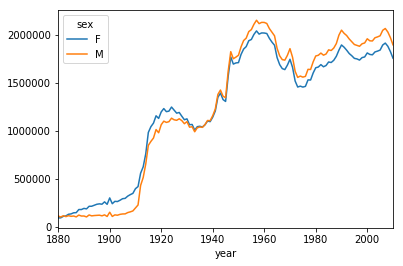

In [321]:
total_birth.plot()